#LIBRARIES

In [53]:
import pandas as pd
import numpy as np
import  os
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
data=pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')
data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


# Data Proprocessing & Cleaning

In [4]:
data.shape,data.size

((5171, 4), 20684)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
duplicate=data[data.duplicated()]
duplicate

,Unnamed: 0,label,text,label_num


**Frequency** **estimating**

In [7]:
freq_table=pd.crosstab(data['label'],'no_of_label')
freq_table

col_0,no_of_label
label,
ham,3672
spam,1499


In [8]:
freq_table=freq_table/len(data)
freq_table

col_0,no_of_label
label,
ham,0.710114
spam,0.289886


**Removing the null values**

In [9]:
data.notnull().sum()

Unnamed: 0    5171
label         5171
text          5171
label_num     5171
dtype: int64

In [10]:
#data=data.dropna()
#error or null values removing function.
data.isnull().sum()


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [11]:
data= data.copy()
data


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [12]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**Changing the data attributes**

In [13]:
data.set_axis(['Serial','label','Text','label_num'], axis='columns',inplace=True)

In [14]:
data.head()

,Serial,label,Text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#EDA-Analysis performing

In [15]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

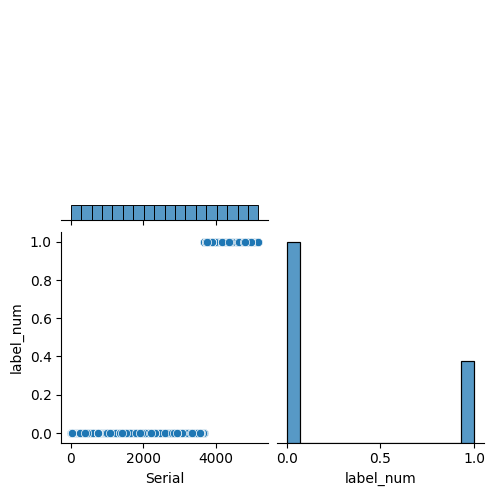

In [16]:
sns.pairplot(data,corner=True)
plt.show()

In [17]:
mean = data['label'].mean
mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object>

In [18]:
mean=data['label_num'].mean
mean()

0.2898859021465867


 correlation co-efficient  


 HEATMAP ------> 



[]

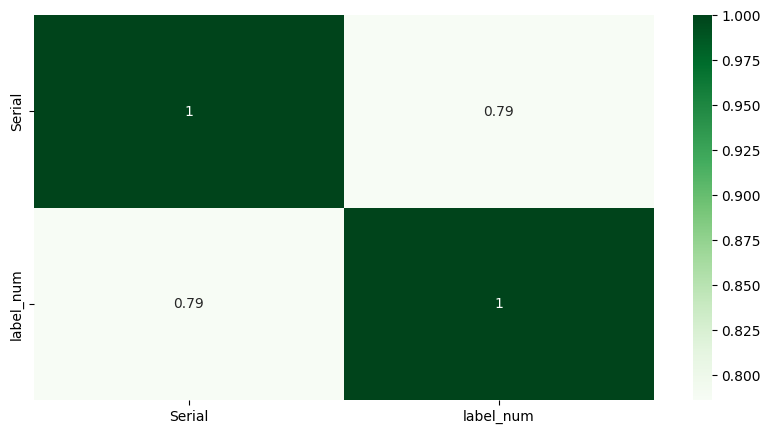

In [19]:
print('\n correlation co-efficient  \n')

print('\n HEATMAP ------> \n')
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.plot()

**using ggplot separating ham & spam messages**

In [20]:
print("\n HAM & SPAM Graph analysis -----> \n\n")
fig=px.bar(data.head(), x="label_num",y="Serial",color="label",template="ggplot2")
fig.show()


 HAM & SPAM Graph analysis -----> 




In [21]:
print("Ham!-->Spam!")
fig=px.bar(data.head(), x="label",y="label_num",color="Text",template="ggplot2")
fig.show()


Ham!-->Spam!


Regression plot!



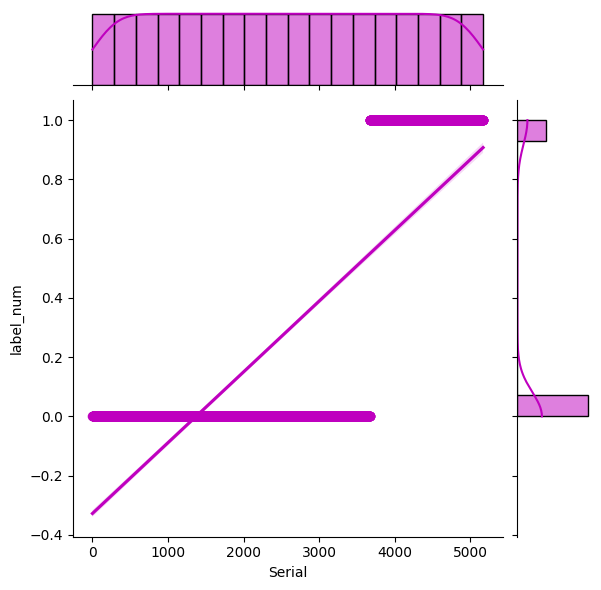

In [44]:
print("Regression plot!\n")
sns.jointplot(x='Serial',y='label_num',data=data,kind='reg',color='m')
plt.show()

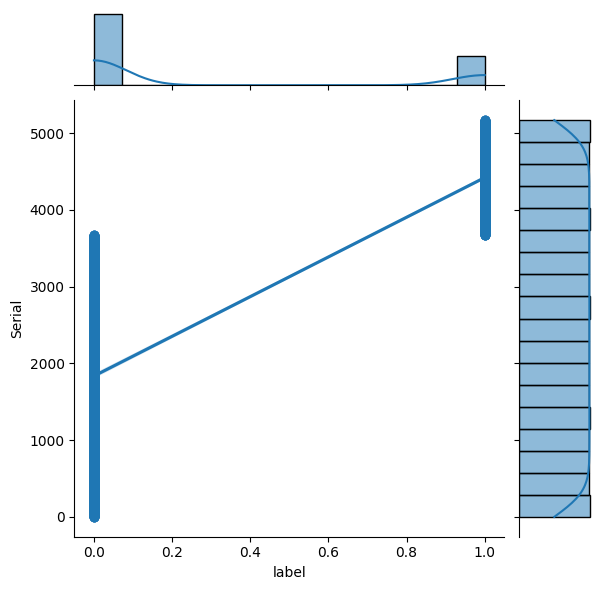

In [58]:
sns.jointplot(data=data,x='label',y='Serial',kind='reg')
plt.show()

In [23]:
mean=data.mean
mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Serial label                                               Text  \
0        605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1       2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2       3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3       4685  spam  Subject: photoshop , windows , office . cheap ...   
4       2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...      ...   ...                                                ...   
5166    1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167     404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168    2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169    1409   ham  Subject: industrial worksheets for august 2000...   
5170    4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2     

In [24]:
data.corr()

,Serial,label_num
Serial,1.000000,0.785847
label_num,0.785847,1.000000


#Label enocoding

In [25]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

In [26]:
X = data.drop('label',axis=1)
y = data['label']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

# Decision TreeRegressor

**predicting mean value & regression value**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(xtrain,ytrain)

#predicting the value

ytest_pred=dtr.predict(xtest)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(ytest,ytest_pred),r2_score(ytest,ytest_pred)))

Results for Decision Tree Regression:
1)Mean Square Error=0.0
2)R-Square Score=1.0


In [41]:
mean=data.mean
mean


<bound method NDFrame._add_numeric_operations.<locals>.mean of       Serial  label  Text  label_num
0        605      0  1209          0
1       2349      0  1985          0
2       3624      0  2774          0
3       4685      1  3158          1
4       2030      0  3613          0
...      ...    ...   ...        ...
5166    1518      0  3254          0
5167     404      0   125          0
5168    2933      0   495          0
5169    1409      0  2223          0
5170    4807      1  2195          1

[5171 rows x 4 columns]>